<a href="https://colab.research.google.com/github/Rukaya-lab/Tensorflow-practice/blob/main/Mnist_number_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing useful Libraries**

In [91]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

**Load the data**

In [2]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

60000
60000
10000
10000


In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
# Take a look how one image looks like
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


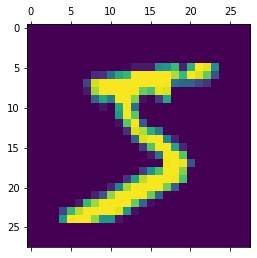

In [11]:
import matplotlib.pyplot as plt

plt.matshow(X_train[0])

#crosschecking with the correct value in y train
print(y_train[0])

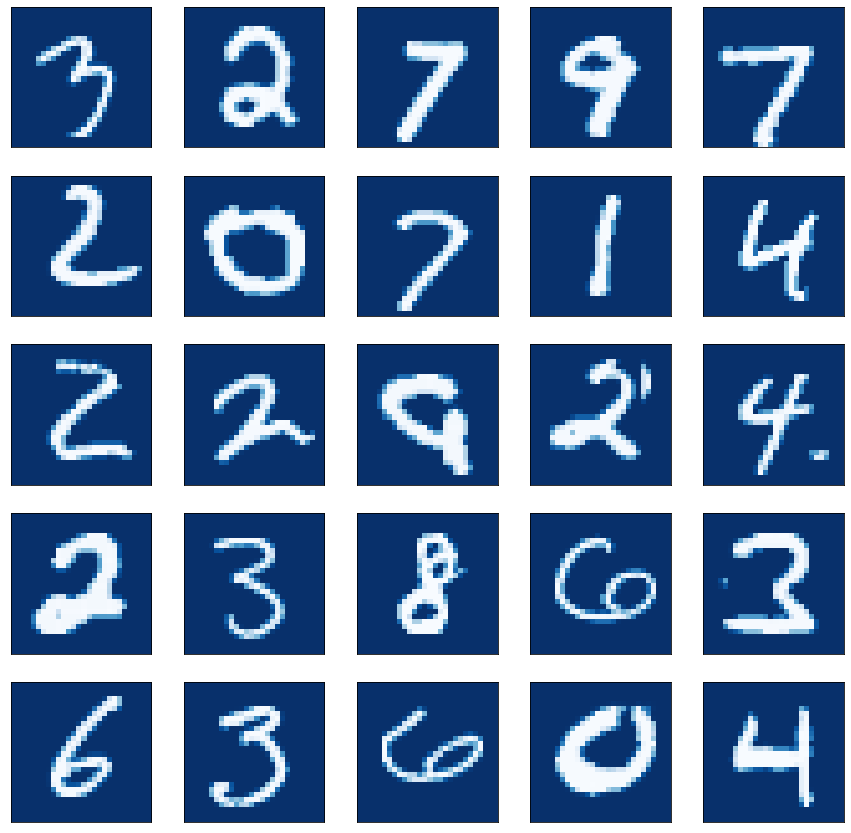

In [16]:
import random

plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0,len(X_train))     
  plt.imshow(X_train[rand_no], cmap='Blues_r')

Data(Pixel) Preprocessing

Each image has 28 *28 pixels with each pixel values from 0 to 255.
To improve the model performance and reducethe range of the pixels, we will need to normalize the data.
that is, dividing the pixels by 255 to get thm in range 0 and 1

In [18]:
X_train = X_train / 255
X_test = X_test / 255

"""
Why divided by 255?
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. """

'\nWhy divided by 255?\nThe pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. '

In [20]:
#view the pixel distribution of an image and the values should be in the range of 0 to 1

X_train[25]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Build the Model**

In [69]:
model = Sequential()
  #input layer size is 784 after flattening
  #hidden layer with 512 neurons
model.add(Dense(512, activation='relu', input_shape =(28*28,), name = 'hidden_layer1'))
model.add(Dropout(rate = 0.3))  #adding dropout layer to prevent overfitting.
model.add(Dense(32, activation= 'relu', name = 'hidden_layer2'))
model.add(Dense(10, activation='softmax', name = 'output_layer'))

In [70]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'mse'])

In [71]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 32)                16416     
_________________________________________________________________
output_layer (Dense)         (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [72]:
X_train_flat = X_train.reshape(X_train.shape[0], 28*28)

X_test_flat = X_test.reshape(X_test.shape[0], 28*28)

In [73]:
history = model.fit(X_train_flat, y_train, epochs = 10, validation_split= 0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4398 - accuracy: 0.8690 - mse: 27.2335 - val_loss: 0.1309 - val_accuracy: 0.9607 - val_mse: 27.4421
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1311 - accuracy: 0.9588 - mse: 27.4038 - val_loss: 0.1013 - val_accuracy: 0.9704 - val_mse: 27.4435
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0919 - accuracy: 0.9710 - mse: 27.2672 - val_loss: 0.1028 - val_accuracy: 0.9700 - val_mse: 27.4446
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0751 - accuracy: 0.9766 - mse: 27.3509 - val_loss: 0.0809 - val_accuracy: 0.9763 - val_mse: 27.4450
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0563 - accuracy: 0.9813 - mse: 27.3493 - val_loss: 0.0846 - val_accuracy: 0.9756 - val_mse: 27.4458
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0518 - accuracy: 0.9828 - mse: 2

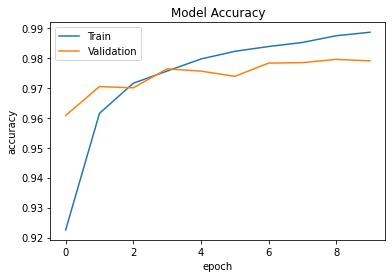

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [75]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0792 - accuracy: 0.9794 - mse: 27.3387


[0.07924812287092209, 0.9793999791145325, 27.33871841430664]

In [97]:
pred = model.predict(X_test_flat)

pred[125]

array([1.3806584e-07, 7.0328610e-06, 1.0376153e-04, 7.3960546e-06,
       2.4677207e-01, 1.0878508e-05, 1.9194133e-09, 7.9612051e-05,
       3.3942644e-05, 7.5298524e-01], dtype=float32)

The array given above are the probabilities of the image passed being a particular number. The maximum probability will be that of the value predicted for the image.
The value at the 0th index in above array of numbers is saying the probability of the digit being 0.

Generalize: The value at the nth index in above array of numbers is saying the probability of the digit being n

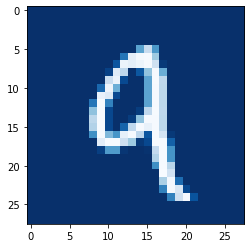

In [95]:
plt.imshow(X_test[125], cmap = 'Blues_r')


In [98]:
## np.argmax finds a maximum element from an array and returns the index of it

np.argmax(pred[125])

9